In [1]:
import matplotlib.pyplot as plt
import astropy.units as u
import numpy as np
from astropy import constants as const
from scipy.special import cbrt
import os

from ClusterModel import model
from ClusterModel import model_tools
from ClusterTools import cluster_profile
from ClusterTools import cluster_spectra
from ClusterTools import cluster_hadronic_emission_kafexhiu2014 as K14
from ClusterTools import cluster_electron_emission
from ClusterTools import map_tools

dict_base = {'font.size':        16,
             'legend.fontsize':  16,
             'xtick.labelsize':  16,
             'ytick.labelsize':  16,
             'axes.labelsize':   16,
             'axes.titlesize':   16,
             'figure.titlesize': 16,    
             'figure.figsize':[8.0, 6.0],
             'figure.subplot.right':0.97,
             'figure.subplot.left':0.15, # Ensure enough space on the left so that all plot can be aligned
             'font.family':'serif',
             'figure.facecolor': 'white',
             'legend.frameon': True}
plt.rcParams.update(dict_base)

In [2]:
clust = model.Cluster()
clust.EBL_model = 'none'
clust.nuclear_enhancement = False
clust.helium_mass_fraction = 0.0
clust.abundance = 0.0
clust.Epmax = 1e7*u.GeV

clust.R_truncation = 1.6*u.Mpc

clust.Npt_per_decade_integ = 100

clust.output_dir = '/Users/adam/Desktop/TestX'
dat_dir = os.getenv('CTAPHYS_EDAT_DIR')
Xband = [0.5, 2.4]*u.keV
pspc_data_file = dat_dir+'/ROSAT/RASS_1_2048.fits'
pspc_sp_file = dat_dir+'/ROSAT/spectrum.sp'
pspc_resp_file = dat_dir+'/ROSAT/pspcb_gain1_256.rsp'
lab_file = dat_dir+'/ROSAT/HI_LAB_II_1_256_nh.fits'

                      ___   __    ___   __   __                      
                     / __) / _\  / __) /  \ (  )                     
                    ( (__ /    \( (_ \(  O )/ (_/\                   
                     \___)\_/\_/ \___/ \__/ \____/                   
   Cluster Atmosphere modeling for Gamma-ray Observations Libraries  
---------------------------------------------------------------------
                                                                     
Setting gNFW Planck coll. (2013) UPP.
Setting EBL_model value
Setting nuclear_enhancement value
Setting helium mass fraction value
Setting abundance value
Setting Epmax value
Setting R_truncation value
Setting: theta_truncation ; Fixing: D_ang
Setting number of point per decade (for integration) value
Setting output_dir value


In [3]:
clust.make_xspec_table(Emin=Xband[0], Emax=Xband[1],
                         Tmin=0.1*u.keV, Tmax=30.0*u.keV, nbin=100,
                         file_HI=lab_file, visu_nH=False,
                         model='APEC',
                         resp_file=pspc_resp_file, data_file=pspc_sp_file, app_nH_model=False,
                         Kcor=False)

<type 'numpy.ndarray'>


/Users/adam/Project/anaconda3/envs/cta/lib/python2.7/site-packages/numpy/core/fromnumeric.py:734: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


In [3]:
output_type = 'S'

/Users/adam/Project/anaconda3/envs/cta/lib/python2.7/site-packages/astropy/units/quantity.py:641: RuntimeWarning: invalid value encountered in true_divide
  *arrays, **kwargs)


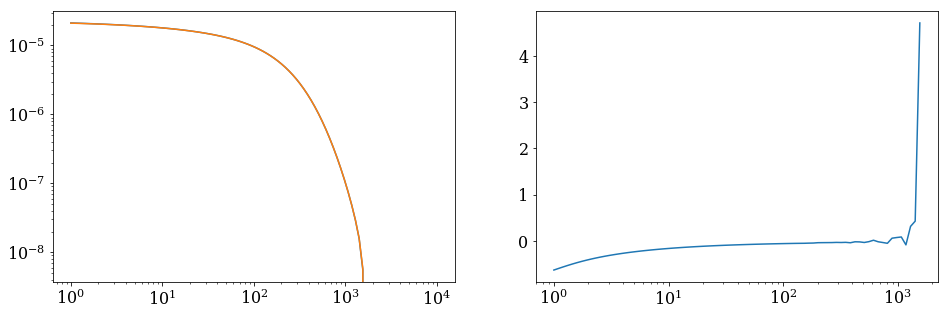

In [4]:
r1, s1 = clust.get_sx_profile(output_type=output_type)
r2, s2 = clust.get_xray_profile2(Rmin_los=0.1*u.kpc, output_type=output_type)

plt.figure(1, figsize=(15,5))
plt.subplot(121)
plt.loglog(r1, s1)
plt.loglog(r2, s2)
plt.subplot(122)
plt.plot(r1, (s2-s1)/s1*100)
plt.xscale('log')

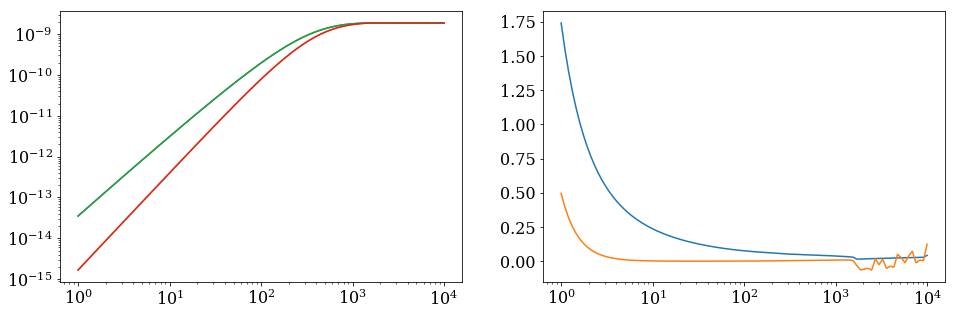

In [5]:
r = np.logspace(0,4,100)*u.kpc
r1, f1 = clust.get_fxcyl_profile(r, output_type=output_type)
r2, f2 = clust.get_fxsph_profile(r, output_type=output_type)
f3 = clust.get_xray_flux2(Rmax=r, Rmin=0.1*u.kpc, Rmin_los=0.1*u.kpc, type_integral='cylindrical', output_type=output_type)
f4 = clust.get_xray_flux2(Rmax=r, Rmin=0.1*u.kpc, Rmin_los=0.1*u.kpc, type_integral='spherical', output_type=output_type)

plt.figure(1, figsize=(15,5))
plt.subplot(121)
plt.loglog(r, f1)
plt.loglog(r, f2)
plt.loglog(r, f3)
plt.loglog(r, f4)
plt.subplot(122)
plt.plot(r, (f1-f3)/f1*100)
plt.plot(r, (f2-f4)/f2*100)
plt.xscale('log')

/Users/adam/Project/anaconda3/envs/cta/lib/python2.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  
/Users/adam/Project/anaconda3/envs/cta/lib/python2.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':
/Users/adam/Project/anaconda3/envs/cta/lib/python2.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in divide
  if sys.path[0] == '':
/Users/adam/Project/anaconda3/envs/cta/lib/python2.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in divide
  if sys.path[0] == '':


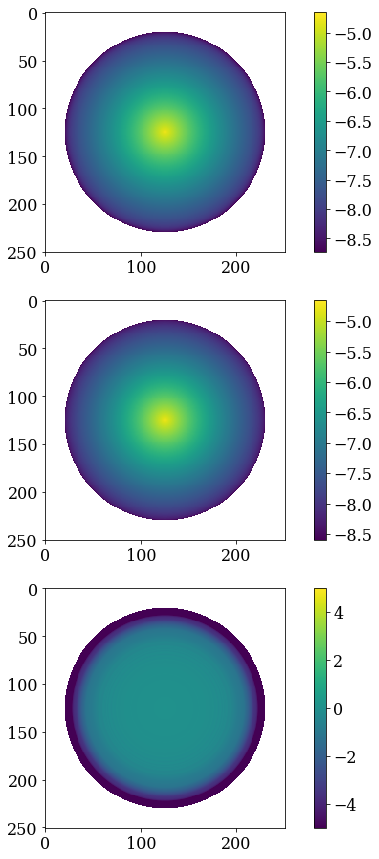

In [6]:
m1 = clust.get_sxmap(output_type=output_type)
m2 = clust.get_xray_map2(output_type=output_type, Normalize=False, Rmin=0.1*u.kpc, Rmin_los=0.1*u.kpc)

plt.figure(1, figsize=(10,15))
plt.subplot(311)
plt.imshow(np.log10(m1.value))
plt.colorbar()
plt.subplot(312)
plt.imshow(np.log10(m2.value))
plt.colorbar()
plt.subplot(313)
plt.imshow((m1.value-m2.value)/m1.value*100, vmin=-5, vmax=5)
plt.colorbar()

In [11]:
m2 = clust.get_xray_map2(output_type='C', Normalize=True, Rmin=0.1*u.kpc, Rmin_los=0.1*u.kpc)

header = clust.get_map_header()

map_tools.get_map_norm(m2.to_value('sr-1'), header)

1.0050050744006465

In [3]:
clust.redshift = 0.9
clust.M500 = 6e14*u.Msun
clust.set_pressure_gas_gNFW_param()
clust.map_reso = 1*u.arcsec
clust.map_fov = 7*u.arcmin
m1 = clust.get_sz_map(Compton_only=False, Normalize=True, Rmin_los=0.1*u.kpc, Rmin=0.1*u.kpc)
header = clust.get_map_header()

map_tools.get_map_norm(m1.to_value('sr-1'), header)

Setting redshift value
Setting: D_ang, D_lum, R500, theta500, theta_truncation ; Fixing: cosmo.
Setting M500 value
Setting: R500, theta500 ; Fixing: redshift, cosmo, D_ang
Setting gNFW Planck coll. (2013) UPP.
Setting the map resolution value
Setting: map_header to None, as map properties are now set by hand
Setting the map field of view
Setting: map_header to None, as map properties are now set by hand


0.9986582064928684

/Users/adam/anaconda2/envs/cta/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


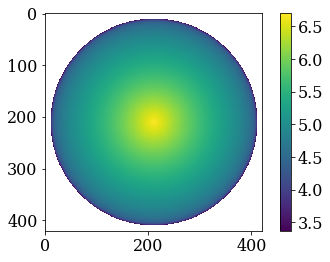

In [4]:
plt.imshow(np.log10(m1.to_value('sr-1')))
plt.colorbar()

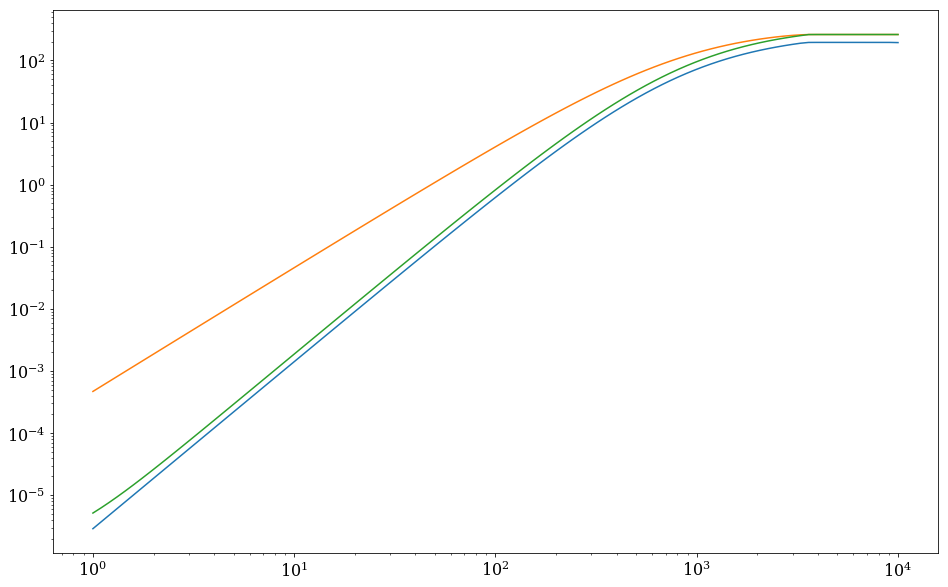

In [37]:
f1 = clust.get_sz_flux(freq0=300*u.GHz, Compton_only=False,Rmin=0.1*u.kpc, Rmax=np.logspace(0,4,100)*u.kpc,type_integral='spherical',Rmin_los=None, NR500_los=5.0)
r, f2 = clust.get_ycyl_profile(np.logspace(0,4,100)*u.kpc, NR500_los=5.0, Npt_los=100)
r, f3 = clust.get_ysph_profile(np.logspace(0,4,100)*u.kpc)

plt.figure(1, figsize=(15,10))
plt.loglog(np.logspace(0,4,100)*u.kpc, f1)
plt.loglog(np.logspace(0,4,100)*u.kpc, f2)
plt.loglog(np.logspace(0,4,100)*u.kpc, f3)

In [25]:
r = np.logspace(0,4,1000)*u.kpc
r, p1 = clust.get_y_compton_profile(r)
r, p2 = clust.get_sz_profile(r, Compton_only=True, Rmin_los=0.1*u.kpc)

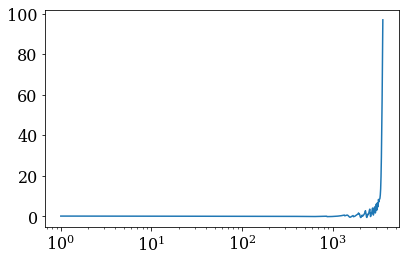

In [26]:
plt.plot(r, (p1-p2)/p1*100)
plt.xscale('log')

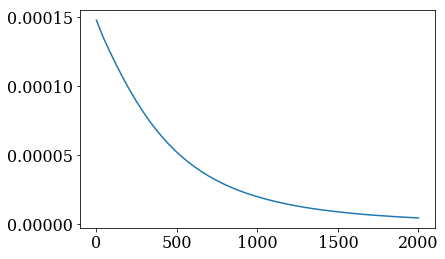

In [27]:
r, p = clust.get_sz_profile(freq0=150*u.GHz, Compton_only=True, radius=np.linspace(0,2000)*u.kpc)
plt.plot(r,p)

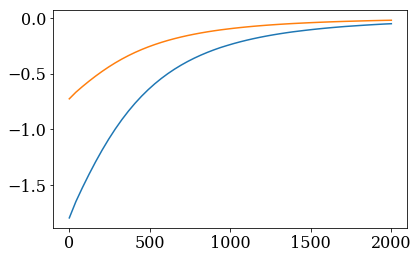

In [28]:
r, p = clust.get_sz_profile(freq0=150*u.GHz, radius=np.linspace(0,2000)*u.kpc)
r, p2 = clust.get_sz_profile(freq0=260*u.GHz, radius=np.linspace(0,2000)*u.kpc)
plt.plot(r, 1e3*(p*500*u.arcsec**2).to('Jy'))
plt.plot(r, 1e3*(-p2*250*u.arcsec**2).to('Jy'))

Setting redshift value
Setting: D_ang, D_lum, R500, theta500, theta_truncation ; Fixing: cosmo.
Setting redshift value
Setting: D_ang, D_lum, R500, theta500, theta_truncation ; Fixing: cosmo.


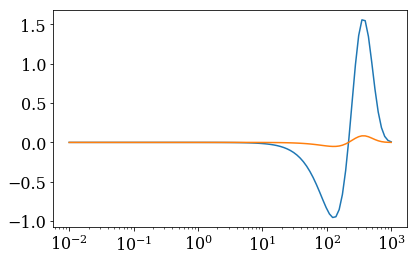

In [29]:
clust.redshift=0.1

f = np.logspace(-2,3,100)*u.GHz

f, s1 = clust.get_sz_spectrum(f, type_integral='cylindrical', Rmax=1*u.Mpc)
f, s2 = clust.get_synchrotron_spectrum(f, type_integral='cylindrical', Rmax=1*u.Mpc)

clust.redshift=1
f, s3 = clust.get_sz_spectrum(f, type_integral='cylindrical', Rmax=1*u.Mpc)

plt.plot(f, s1)
#plt.plot(f, s2)
plt.plot(f, s3)
#plt.yscale('log')
plt.xscale('log')

In [14]:
f, y = clust.get_sz_spectrum(f, type_integral='cylindrical', Rmax=1*u.Mpc, Compton_only=True)
y

<Quantity [131.54419185, 131.54419185, 131.54419185, 131.54419185,
           131.54419185, 131.54419185, 131.54419185, 131.54419185,
           131.54419185, 131.54419185, 131.54419185, 131.54419185,
           131.54419185, 131.54419185, 131.54419185, 131.54419185,
           131.54419185, 131.54419185, 131.54419185, 131.54419185,
           131.54419185, 131.54419185, 131.54419185, 131.54419185,
           131.54419185, 131.54419185, 131.54419185, 131.54419185,
           131.54419185, 131.54419185, 131.54419185, 131.54419185,
           131.54419185, 131.54419185, 131.54419185, 131.54419185,
           131.54419185, 131.54419185, 131.54419185, 131.54419185,
           131.54419185, 131.54419185, 131.54419185, 131.54419185,
           131.54419185, 131.54419185, 131.54419185, 131.54419185,
           131.54419185, 131.54419185, 131.54419185, 131.54419185,
           131.54419185, 131.54419185, 131.54419185, 131.54419185,
           131.54419185, 131.54419185, 131.54419185, 131.54419

# Check the injection rate

In [ ]:
energy=np.logspace(-1,10, 100)*u.MeV
radius=np.logspace(0,4,100)*u.kpc
R_cre = clust.get_rate_cre(energy, radius)
e, S_crp = clust.get_crp_spectrum(energy)

plt.figure(1)
plt.imshow(np.log10(R_cre.value), origin='lower')
plt.colorbar()

plt.figure(2, figsize=(15,10))
for i in range(len(R_cre[0,:])):
    plt.loglog(energy, R_cre[:,i], '.')
plt.loglog(energy, S_crp*np.amax(R_cre.value)/np.amax(S_crp.value))
plt.vlines((const.m_e*const.c**2).to('MeV').value, 1e-10*np.amax(R_cre.value), np.amax(R_cre.value))
R_cre

In [ ]:
%%timeit
clust.Npt_per_decade_integ = 100
energy=np.logspace(-1,10, 100)*u.MeV
radius=np.logspace(0,4,100)*u.kpc
R_cre = clust.get_rate_cre(energy, radius)

# Check CRe spectrum 

In [ ]:
%%timeit
clust.Npt_per_decade_integ = 100

energy=np.logspace(-1,10, 100)*u.MeV
radius=np.logspace(0,4,100)*u.kpc
Scre = clust.get_spectrum_cre(energy, radius)

In [ ]:
clust.Npt_per_decade_integ = 10

energy=np.logspace(-1,10, 100)*u.MeV
radius=np.logspace(0,4,100)*u.kpc
S_cre = clust.get_spectrum_cre(energy, radius)
e, S_crp = clust.get_crp_spectrum(energy)

In [ ]:
plt.figure(1)
plt.imshow(np.log10(S_cre.value), origin='lower')
plt.colorbar()

plt.figure(2, figsize=(15,10))
for i in range(len(S_cre[0,:])):
    plt.loglog(energy, S_cre[:,i], '.')
plt.loglog(energy, S_crp*np.amax(S_cre.value)/np.amax(S_crp.value)/1000)
plt.loglog(energy, (energy*S_crp)*np.amax(S_cre.value)/np.amax(((energy*S_crp)).value)/1000)
plt.loglog(energy, (energy**-1*S_crp)*np.amax(S_cre.value)/np.amax(((energy**-1*S_crp)).value)/1000)
plt.vlines((const.m_e*const.c**2).to('MeV').value, 1e-10*np.amax(S_cre.value), np.amax(S_cre.value))
S_cre

In [ ]:
energy=np.logspace(-1,10, 100)*u.MeV
radius=np.logspace(0,4,100)*u.kpc
clust.Npt_per_decade_integ = 100
S_cre_1 = clust.get_spectrum_cre(energy, radius)
clust.Npt_per_decade_integ = 20
S_cre_2 = clust.get_spectrum_cre(energy, radius)

In [ ]:
plt.figure(1, figsize=(15,10))
plt.imshow((S_cre_1.value-S_cre_2.value)/S_cre_1.value*100, origin='lower', cmap='nipy_spectral')
plt.colorbar()

In [ ]:
import naima
from astropy import constants as const

In [ ]:
Eg  = np.logspace(-16,10,100)*u.eV
radius = np.logspace(0,4, 100)*u.kpc

Emin = const.m_e*const.c**2
Ee  = np.logspace(np.log10(Emin.to_value('GeV')),6,100)*u.GeV
f_r = 1.0 * np.exp(-radius.to_value('kpc')/400)
f_e = 1.0 * Ee.to_value('GeV')**-2
B   = 1*u.G * f_r**0.5

We = 1000*u.GeV*u.cm**-3

In [ ]:
i = 2

In [ ]:
def Je(eng):
    return eng**-2

def Je2(rad, eng):
    et = (np.tile(eng**-2, [len(rad),1]))
    rt = np.tile(np.exp(-rad/400), [len(eng),1]).T
    return  et * rt

In [ ]:
syn = cluster_electron_emission.ClusterElectronEmission(Je2, Eemin=np.amin(Ee.value)*Ee.unit, Eemax=np.amax(Ee.value)*Ee.unit)
syn.set_cr_energy_density(We*f_r, radius, Emin=500*u.MeV, Emax=1*u.TeV)
spec = syn.synchrotron(Eg, radius_input=radius, B=B)

In [ ]:
PartDist = naima.models.TableModel(Ee, Je(Ee.to_value('GeV'))*u.GeV**-1) # Trick Naima units
syn_naima = naima.models.Synchrotron(PartDist, B=B[i])
syn_naima.Eemin = np.amin(Ee.value)*Ee.unit
syn_naima.Eemax = np.amax(Ee.value)*Ee.unit
syn_naima.set_We(We.to_value('GeV cm-3')*u.GeV*f_r[i], Eemin=500*u.MeV, Eemax=1*u.TeV)
spec_naima = syn_naima._spectrum(Eg)*u.cm**-3

In [ ]:
plt.figure(1, figsize=(15,10))
plt.loglog(Eg, spec[i,:].to('GeV-1 s-1 cm-3'), linewidth=3)
plt.loglog(Eg, spec_naima.to('GeV-1 s-1 cm-3'), '--')

In [ ]:
import naima
from astropy import constants as const

In [ ]:
Eg  = np.logspace(-20,10,100)*u.GeV
radius = np.logspace(0,4,100)*u.kpc

Emin = const.m_e*const.c**2
Ee  = np.logspace(np.log10(Emin.to_value('GeV')),6,100)*u.GeV
f_r = 1.0 * (1+(radius.to_value('kpc')/10.0)**2)**-1.5
f_e = 1.0 * Ee.to_value('GeV')**-2

We = 1000*u.GeV*u.cm**-3

In [ ]:
def Je(eng):
    return eng**-2

def Je2(rad, eng):
    et = (np.tile(eng**-2, [len(rad),1]))
    rt = np.tile(1/(1+(rad/10.0)**2)**-1.5, [len(eng),1]).T
    return  et * rt

In [ ]:
i = 0

In [ ]:
ic = cluster_electron_emission.ClusterElectronEmission(Je2, Eemin=np.amin(Ee.value)*Ee.unit, Eemax=np.amax(Ee.value)*Ee.unit)
ic.set_cr_energy_density(We*f_r, radius=radius, Emin=500*u.MeV, Emax=1*u.TeV)
spec = ic.inverse_compton(Eg, radius_input=radius, redshift=0.0)

In [ ]:
PartDist = naima.models.TableModel(Ee, Je(Ee.to_value('GeV'))*u.GeV**-1) # Trick Naima units
ic_naima = naima.models.InverseCompton(PartDist)
ic_naima.Eemin = np.amin(Ee.value)*Ee.unit
ic_naima.Eemax = np.amax(Ee.value)*Ee.unit
ic_naima.set_We(We.to_value('GeV cm-3')*u.GeV*f_r[i], Eemin=500*u.MeV, Eemax=1*u.TeV)
spec_naima = ic_naima._spectrum(Eg)*u.cm**-3

In [ ]:
plt.figure(1, figsize=(15,10))
plt.loglog(Eg, Eg**2*spec[i,:].to('GeV-1 s-1 cm-3'), linewidth=3)
plt.loglog(Eg, Eg**2*spec_naima.to('GeV-1 s-1 cm-3'), '--')